In [74]:

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
import pandas as pd
import numpy as np
# import math

import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Data

In [17]:
from pandas import ExcelWriter
from pandas import ExcelFile

df = pd.read_excel('sample.xlsx', sheet_name='Sheet1')
df = df.dropna()
df

,AGE_YRS,SEX,NUMDAYS,OTHER_MEDS,CUR_ILL,HISTORY,ALLERGIES,VAX_MANU,VAX_DOSE_SERIES,NUM_SYMPTOMS
0,47.0,1,3.0,1,0,1,0,1,1,5
2,30.0,1,0.0,0,0,0,0,1,2,5
3,55.0,2,3.0,0,0,0,1,0,1,1
4,32.0,2,0.0,1,0,1,1,0,1,3
5,28.0,2,0.0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...
995,32.0,1,0.0,1,0,0,1,1,2,3
996,16.0,1,1.0,0,0,0,0,1,1,1
997,43.0,2,0.0,1,0,1,0,1,1,2
998,34.0,2,0.0,0,0,0,0,1,2,2


## Scaling the Data

In [20]:
# used the steps from hw3
X = df[['AGE_YRS', 'NUMDAYS','SEX','OTHER_MEDS','CUR_ILL','HISTORY','ALLERGIES','VAX_MANU', 'VAX_DOSE_SERIES']].to_numpy()
y = df['NUM_SYMPTOMS'].to_numpy()

print(X)
print(y)

[[47.  3.  1. ...  0.  1.  1.]
 [30.  0.  1. ...  0.  1.  2.]
 [55.  3.  2. ...  1.  0.  1.]
 ...
 [43.  0.  2. ...  0.  1.  1.]
 [34.  0.  2. ...  0.  1.  2.]
 [32.  0.  2. ...  0.  1.  2.]]
[5 5 1 3 1 5 1 1 3 5 5 5 1 3 5 1 1 2 5 5 3 5 4 1 5 2 4 1 1 4 5 2 3 2 1 1 5
 5 5 5 5 3 1 5 5 4 3 1 5 3 4 5 3 2 5 5 4 2 4 3 5 5 3 5 4 4 5 5 5 5 5 5 5 1
 3 2 3 1 5 5 5 5 2 5 2 3 5 2 3 5 5 1 3 3 5 5 2 5 5 5 1 3 1 5 1 5 5 5 5 4 1
 3 2 4 2 2 5 3 5 5 4 5 1 3 3 2 3 4 3 2 1 5 4 5 2 1 4 3 5 5 5 3 5 1 3 5 5 1
 2 3 3 5 5 1 1 3 4 1 3 2 1 3 5 5 2 4 4 5 5 1 2 5 3 3 5 5 5 3 3 2 4 5 2 5 3
 2 5 1 5 2 5 5 3 5 5 1 1 5 5 5 1 1 2 4 3 5 5 3 3 5 5 1 3 5 3 3 4 5 5 4 5 4
 3 5 4 1 5 3 4 5 2 5 3 5 1 4 5 5 5 1 2 5 3 2 5 5 4 5 2 4 5 4 4 2 3 3 5 5 5
 5 4 4 2 5 1 5 1 2 4 5 4 3 5 2 5 2 2 2 4 3 1 1 5 5 5 5 1 5 5 5 5 3 5 3 5 5
 5 5 4 4 1 3 5 2 5 2 5 5 5 5 5 1 1 2 1 5 5 5 1 5 5 2 3 5 2 5 4 5 5 4 3 4 5
 5 2 4 1 4 2 3 3 3 2 5 5 2 5 3 5 5 5 3 2 1 5 1 3 2 4 5 5 2 3 3 3 5 2 5 3 1
 5 2 5 3 3 1 4 4 5 1 5 3 5 4 2 5 1 5 5 5 5 5 4 3 3 3 1 5 1

In [44]:
scale = preprocessing.scale(X)

XTrain, XTest, yTrain, yTest = train_test_split(X,y, test_size=.4, random_state=42)
# print(y2dTrain)

## Logistic Regression using L1 penalty

In [54]:
# code from hw5
acc_train_logreg = [] 
acc_test_logreg = []
c_logreg = []

In [66]:
def logreg_model(c , X_train, Y_train, X_test, Y_test):

    logreg = linear_model.LogisticRegression(penalty='l1', C=c, solver='saga')
 
    logreg.fit(X_train, Y_train)
    
    Yhat_train = logreg.predict(X_train)

    acc_train = logreg.score(X_train, Y_train)
    acc_train_logreg.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
 
    Yhat_test = logreg.predict(X_test)
    
    
    acc_test = logreg.score(X_test, Y_test)
    acc_test_logreg.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)
    

    c_logreg.append(c)

In [67]:

cVals = [0.0001, 0.001, 0.01, 0.1, 1, 10]
for c in cVals:
    logreg_model(c, XTrain,yTrain, XTest, yTest)

Accuracy on training data = 0.406780
Accuracy on test data = 0.473239
Accuracy on training data = 0.406780
Accuracy on test data = 0.473239
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached whi

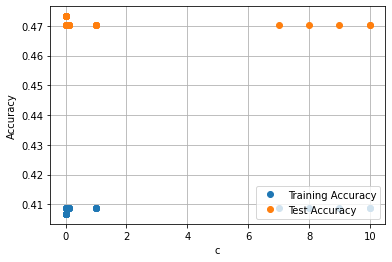

In [68]:
plt.plot(c_logreg, acc_train_logreg, 'o')
plt.plot(c_logreg, acc_test_logreg, 'o')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')

## Logistic Regression with L2 penalty

In [69]:
acc_train_logreg2 = [] 
acc_test_logreg2 = []
c_logreg2 = []

In [70]:
def logreg2_model(c , X_train, Y_train, X_test, Y_test):
    logreg2 = linear_model.LogisticRegression(C=c)
    logreg2.fit(X_train, Y_train)
    Yhat_train = logreg2.predict(X_train)
    acc_train = logreg2.score(X_train, Y_train)
    acc_train_logreg2.append(acc_train)
    print("Accuracy on training data = %f" % acc_train)
    
    Yhat_test = logreg2.predict(X_test)
    
    acc_test = logreg2.score(X_test, Y_test)
    acc_test_logreg2.append(acc_test)
    print("Accuracy on test data = %f" % acc_test)

    c_logreg2.append(c)

In [72]:
for c in cVals:
    logreg2_model(c, XTrain, yTrain, XTest, yTest)

Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
Accuracy on training data = 0.406780
Accuracy on test data = 0.470423
Accuracy on training data = 0.406780
Accuracy on test data = 0.464789
Accuracy on training data = 0.406780
Accuracy on test data = 0.456338
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/l

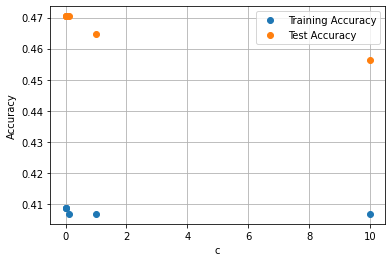

In [73]:
plt.plot(c_logreg2, acc_train_logreg2, 'o')
plt.plot(c_logreg2, acc_test_logreg2, 'o')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.grid()

plt.legend(['Training Accuracy', 'Test Accuracy'], loc='upper right')

## Logistic Regression Using a Polynomial feature Transformation

In [77]:
poly = PolynomialFeatures(3)

XTransformedTrain = poly.fit_transform(XTrain)
XTransformedTest = poly.fit_transform(XTest)

print(XTransformedTrain.shape)
print(XTransformedTest.shape)

(531, 220)
(355, 220)


/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
Accuracy on training data = 0.408663
Accuracy on test data = 0.470423
/home/firewolf/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter w

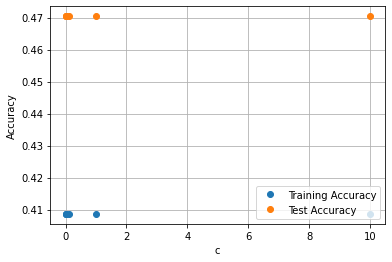

In [79]:
acc_train_logreg = []
acc_test_logreg = []
c_logreg = []

# Call the function logreg_model.
for c in cVals:
    logreg_model(c, XTransformedTrain, yTrain, XTransformedTest, yTest)
    
plt.plot(c_logreg, acc_train_logreg, 'o')
plt.plot(c_logreg, acc_test_logreg, 'o')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.grid()


# Use the following function to have a legend
plt.legend(['Training Accuracy', 'Test Accuracy'], loc='lower right')